## Spearman's $ρ$ (rho)

Spearman's $\rho$ is a non-parametric correlation measure. To be very specific, it measures the strength and direction of a monotonic relationship between two variables.
- Monotonic means variables are consistently increasing or decreasing, but not necessarily at a constant rate.

__Assumptions__
1. Ordinal level data or higher.
2. Non-linear monotonic relationship.

You can also add to this that if you violate the assumptions necessary for Pearson's r, that you can instead use Spearman's $\rho$. In particular, you have outliers that would distort Pearson's r, or you cannot safely assume approximate normality.

So, why do we not need to assume linearity or approximate normality? It's because Spearman's $\rho$ uses rank values of data and not the raw data. Ranked data means that you actually rank the values from 1st through nth place based on each data point's raw value, and then you use all of the values in the Spearman's $\rho$ formula:

$$
\rho = 1 - \frac{6\sum d^{2}_{i}}{n(n^{2} - 1)}
$$

- n is the number of paired variables
- d is the difference in ranks of the paired variables

At this point you're likely wondering: "What about if there's tied ranks?"

Great question! In this scenario the calculation resorts to a more general formula that resembles that of the general form of Pearson's r:

$$
\rho = \frac{cov(R_{x}, R_{y})}{\sigma_{R_{x}} \sigma_{R_{y}}}
$$
- $R_{x}$, $R_{y}$ are the ranks of your two variables
- $cov(R_{x}, R_{y})$ is the covariance of the ranks
- $\sigma_{R_{x}}, \sigma_{R_{y}}$ is the standard deviation of the ranks

As you can see, when there are ties the formula is now a standardized measure of covariance of the ranks. Note that when you're doing this in Python, pandas' ```corr``` and ```scipy.stats.spearmanr``` will automatically choose the right formula for you.

__How to Interpret__

If you've read the Pearson's r section, then you will see the interpretation is really similar.

| Value Range | Description |
|-------------|-------------|
| r = 0 | No correlation |
| r = 1 | Perfect correlation |
| 0 < r < 0.3 | Weak positive correlation |
| -0.3 < r < 0 | Weak negative correlation |
| 0.3 $\leq$ r < 0.7 | Moderate positive correlation |
| -0.7 < r $\leq$ -0.3 | Moderate negative correlation |
| r $\geq$ 0.7 | Strong positive correlation |
| r $\leq$ -0.7 | Strong negative correlation|

#### Python Code Example

In [ ]:
# Import
import numpy as np
import pandas as pd

# Correlation coefficient
import scipy.stats as stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Penguins dataset from Seaborn - drop missing variables
planets = sns.load_dataset('planets').dropna()
df = pd.DataFrame(planets)

# View some details
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


To start, let's investigate the distributions of each variable both statistically and visually.

In [ ]:
# Check skew and kurtosis
pd.DataFrame(data={'skew': df.iloc[:, 2:6].skew(), 'kurtosis': df.iloc[:, 2:6].kurtosis()}).style.background_gradient(cmap='coolwarm')

,skew,kurtosis
orbital_period,5.292769,45.491120
mass,2.590085,7.962541
distance,2.795719,11.529675
year,-0.847536,0.235389


Ignoring year, the other 3 variables have fairly strong skew and kurtosis values. Based on this you can justify using Spearman's $\rho$, but let's visualize their distributions to see how bad it is.

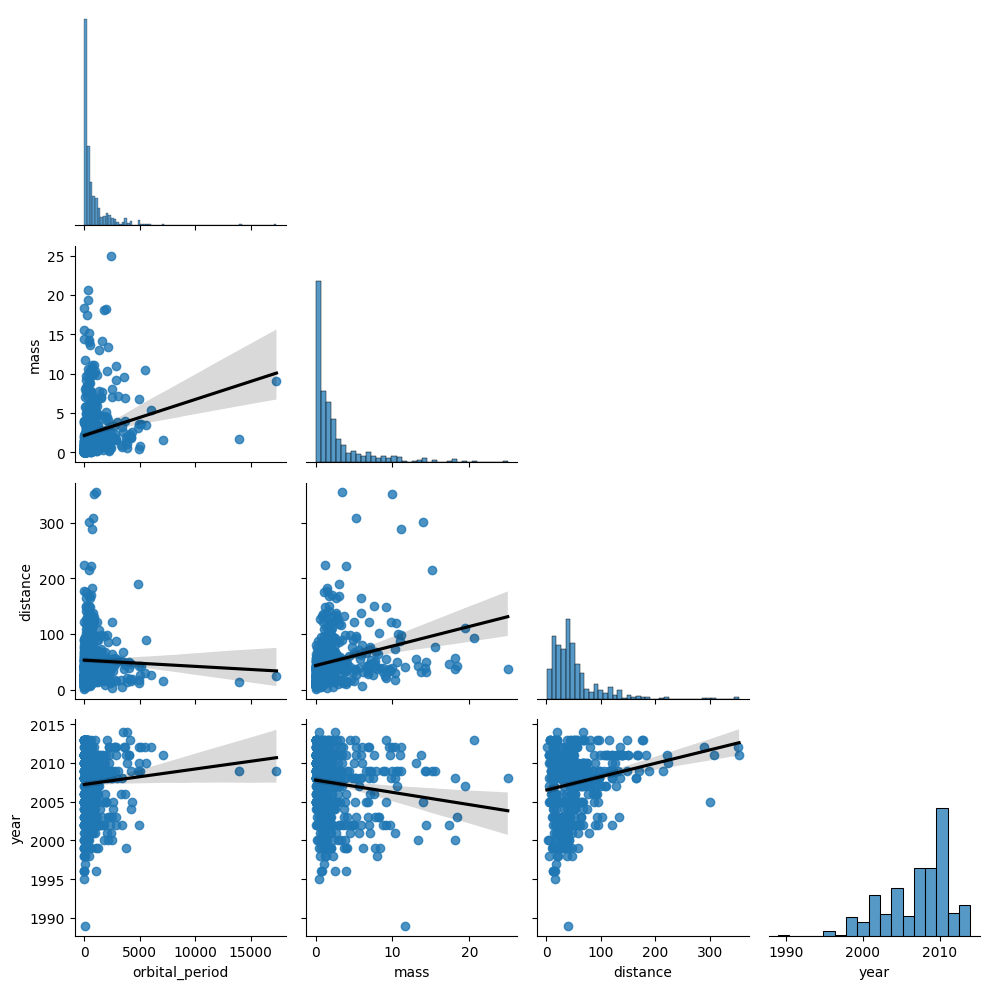

In [ ]:
# Seaborn pair plot
sns.pairplot(df.iloc[:, 2:6], corner=True, kind='reg', plot_kws={'line_kws': {'color': 'black'}})

plt.tight_layout()
plt.show()

In [ ]:
### Individual calculations of Spearman's rho - excluding number, year
for col in df.iloc[:, 2:5].columns:
  # Exclude orbital_period
  if col != 'orbital_period':
    # Calculate Spearman's rho
    r, p = stats.spearmanr(df['orbital_period'], df[col])
    # Output display
    print(f'Spearman\'s rho between Orbital Period and {col}: {round(r,2)} | p-value: {p}')
    print('Positive relationship \n' if r > 0 else 'Negative relationship \n')

Spearman's rho between Orbital Period and mass: 0.54 | p-value: 1.6395198723487584e-39
Positive relationship 

Spearman's rho between Orbital Period and distance: 0.19 | p-value: 2.4062719749387224e-05
Positive relationship 



In [ ]:
# Show the matrix
df.iloc[:, 2:5].corr(method='spearman').style.background_gradient(cmap='coolwarm')

,orbital_period,mass,distance
orbital_period,1.000000,0.542858,0.188038
mass,0.542858,1.000000,0.467621
distance,0.188038,0.467621,1.000000


This is a small set of variables, but I will still show the Seaborn heatmap method.

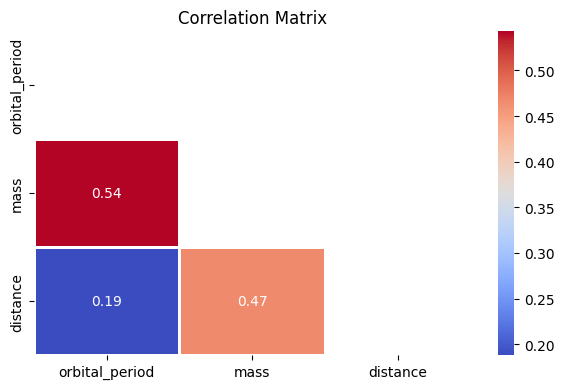

In [ ]:
# Visualize the matrix via Seaborn
planets_corr = df.iloc[:, 2:5].corr(method='spearman')

mask = np.triu(np.ones_like(planets_corr, dtype=bool))

plt.figure(figsize=(6,4))
sns.heatmap(planets_corr, mask=mask, annot=True, fmt='.2g', cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix')
plt.tight_layout()